In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_moons
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors


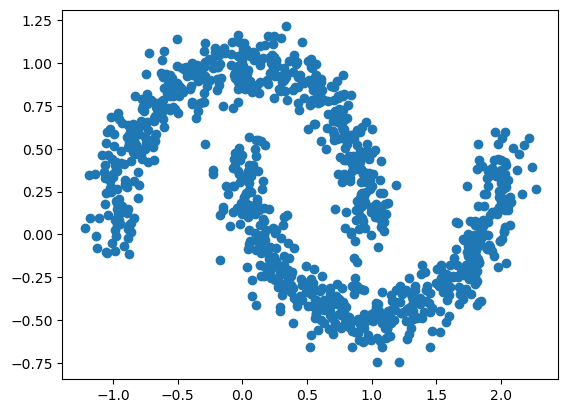

In [5]:
moons = make_moons(n_samples = 1000, noise=.1, random_state=42)[0]
plt.scatter(moons[:,0], moons[:,1])


# scale the data.
scaler = StanderdScaler()

In [11]:
# scale the data.
scaler = StandardScaler()
scaler_df = scaler.fit_transform(moons)
scaler_df

array([[-0.63080129,  0.39150542],
       [ 0.61191562, -1.32649443],
       [ 0.42367059, -0.99855225],
       ...,
       [ 1.36001201, -1.18427533],
       [-1.68110979,  0.03251676],
       [ 0.33156714,  0.73435543]])

In [18]:
min_samples=30 
knn =NearestNeighbors(n_neighbors=min_samples)
knn.fit(scaler_df)
distances, indices = knn.kneighbors(scaler_df)
distances[:5]

array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

In [20]:
# Obtain the furthest distance for each point
farthest_distances = distances[:, -1]
farthest_distances
# Sort the furthest distance for each point
sorted_distances = np.sort(farthest_distances)
sorted_distances[0:5]




array([0.14650369, 0.14797938, 0.14803976, 0.15245298, 0.15395415])

In [23]:
farthest_distances 

array([0.3189059 , 0.22242699, 0.3718598 , 0.34914944, 0.19111925,
       0.29224074, 0.17539582, 0.37378483, 0.20360661, 0.21155392,
       0.19371494, 0.21772038, 0.22761182, 0.2393763 , 0.28208345,
       0.26090647, 0.26162817, 0.20962155, 0.21072639, 0.21104516,
       0.19987972, 0.28403517, 0.23772126, 0.27450488, 0.21950665,
       0.20780654, 0.21895937, 0.28986565, 0.20036805, 0.24030093,
       0.18688973, 0.21422607, 0.22565384, 0.25251965, 0.2204953 ,
       0.44966478, 0.17712201, 0.32566226, 0.18301924, 0.23306404,
       0.38528059, 0.20309471, 0.23842979, 0.39525225, 0.1994386 ,
       0.22369013, 0.31226658, 0.21824708, 0.30686148, 0.17985921,
       0.24354579, 0.2181689 , 0.19756093, 0.18961577, 0.24867202,
       0.25412731, 0.20405823, 0.23615834, 0.19486553, 0.19369042,
       0.27175705, 0.30028948, 0.33616801, 0.1665367 , 0.21520534,
       0.14803976, 0.21912558, 0.18370817, 0.22037039, 0.20304365,
       0.24205132, 0.26642723, 0.21418057, 0.19632285, 0.24925

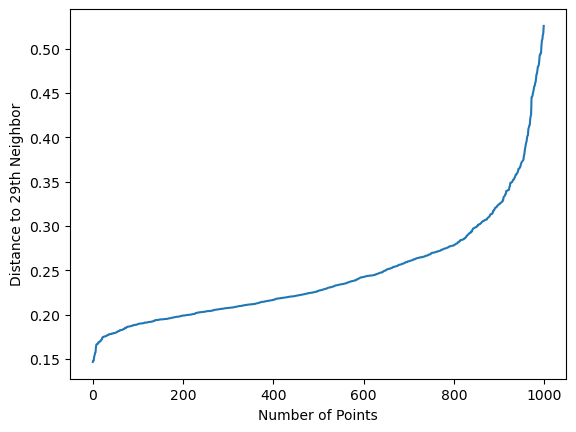

In [21]:
# Plot the distances required for points to be included in a cluster with min sample of 20
plt.plot(sorted_distances)
plt.xlabel("Number of Points")
plt.ylabel("Distance to 29th Neighbor")
plt.show()



In [24]:
db =DBSCAN(eps=0.35 , min_samples=min_samples,).fit(scaler_df)

In [25]:
db.labels_ 

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,
        0,  1,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  1,
        0, -1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,
        1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1

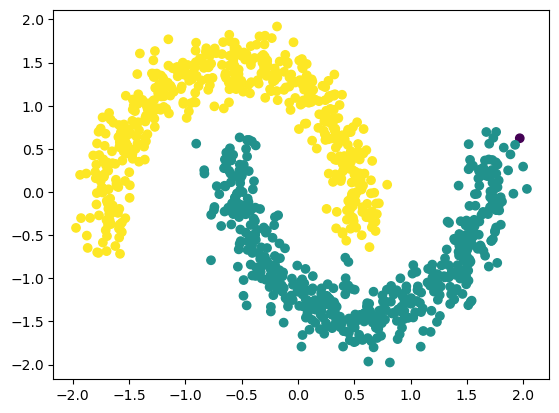

In [26]:
plt.scatter(scaler_df[:,0], scaler_df[:,1], c=db.labels_ )

# Cluster the data using Agglomerative Clusterin 

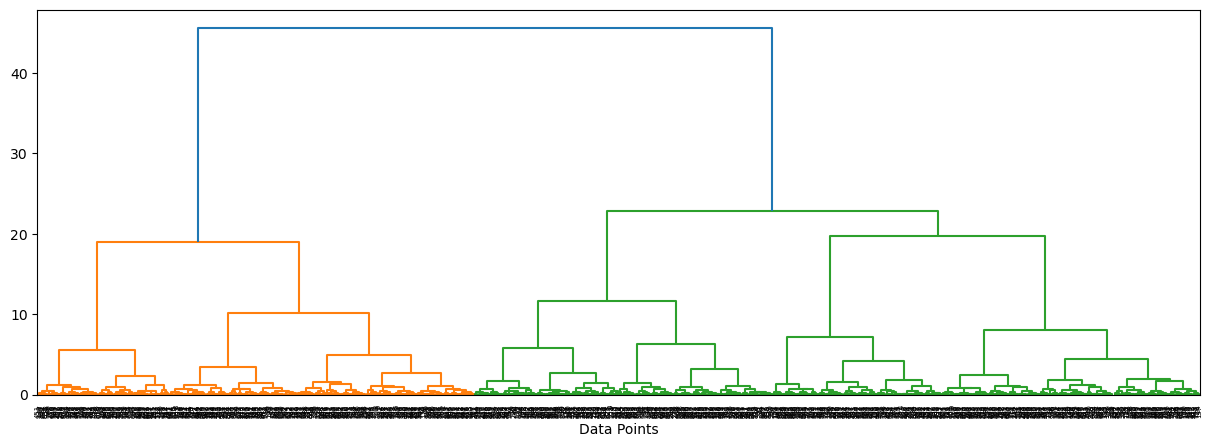

In [28]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaler_df ,method="ward"))
plt.xlabel('Data Points');

2 cluster 

In [30]:
agg = AgglomerativeClustering(n_clusters=2,linkage="ward")
agg.fit(scaler_df)

AgglomerativeClustering()

In [32]:
labels= agg.labels_

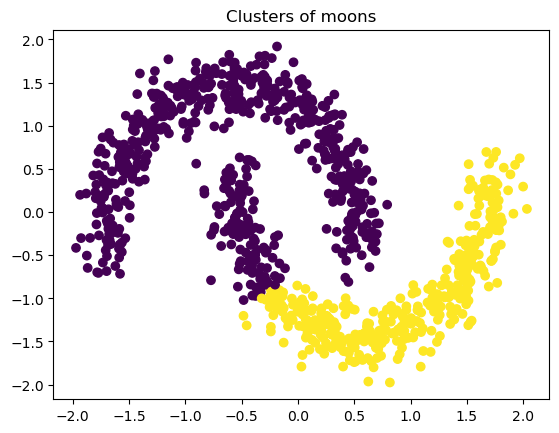

In [34]:
plt.scatter(scaler_df[:,0],scaler_df[:,1] ,c=labels)
plt.title('Clusters of moons');

* Which algorithm does the best job of clustering this dataset?
    * The DBSCAN better separated the two moons from each other. 